In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential,Input,Model
from keras.models import load_model
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K

Using TensorFlow backend.


In [2]:
toyset = np.load('file_path//test_toysets.npz') # Load datasets for predicting (example is toysets)

In [3]:
toy_X, toy_y = toyset['x'], toyset['y'] # Assignment each variable of datasets

In [4]:
toy_X.shape # The shape of variables 

(210, 27889)

In [5]:
toy_X = np.expand_dims(toy_X, axis=2) # Extend dimensions to fit model for predicting datasets

210 test samples


In [6]:
toy_X.shape # The shape of variables after extend dimensions

(210, 27889, 1)

In [7]:
model = load_model('file_path//DeepIC50.h5') # Load DeepIC50 model

W1008 21:16:30.485996 10668 deprecation_wrapper.py:119] From C:\Users\a\Anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1008 21:16:37.314769 10668 deprecation_wrapper.py:119] From C:\Users\a\Anaconda3\envs\tf_gpu_3.6\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [12]:
predicted_toysets = model.predict(toy_X) # Predicting dataset, result is the probability value that each class is correct

In [17]:
predicted_toysets_classes = np.argmax(np.round(predicted_toysets),axis=1) # Convert to a class with probability values that are correct

In [19]:
num_classes = 3 # Number of class
predicted_toysets_categorical = keras.utils.to_categorical(predicted_toysets_classes, num_classes) # Convert class to one-hot encoding 

In [21]:
toy_y_classes = np.argmax(toy_y,axis=1) # Convert one-hot encoding to class

In [22]:
confusion_matrix(toy_y_classes, predicted_toysets_classes, labels=[0,1,2]) # Show confusion matrix 

array([[62,  8,  0],
       [ 3, 66,  1],
       [ 6, 10, 54]], dtype=int64)

In [23]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(toy_y[:, i], predicted_toysets[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

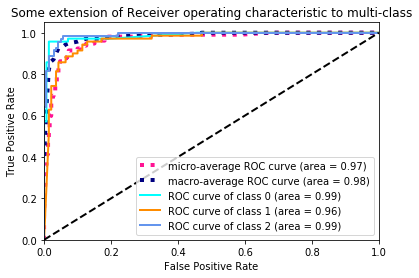

In [24]:
fpr["micro"], tpr["micro"], _ = roc_curve(toy_y.ravel(), predicted_toysets.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
